In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [2]:
def synthetic_data(w, b, num_examples): #@save
    """生成 y = Xw + b 的噪声"""
    X = torch.randn(num_examples, len(w))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.Tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [3]:
print(f'features:{features[0]}\nlabel:{labels[0]}')

features:tensor([ 0.1734, -1.5683])
label:tensor([9.8762])


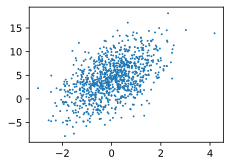

In [4]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 0].detach().numpy(), labels.detach().numpy(), 1)

In [5]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(num_examples, i+batch_size)])
        yield features[batch_indices], labels[batch_indices]

In [6]:
w = torch.normal(0, 0.01, (2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [7]:
def linreg(X, w, b):    #@save
    """线性回归模型"""
    return torch.matmul(X, w) + b

In [8]:
def squared_loss(y_hat, y): #@save
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [9]:
def sgd(params, lr, batch_size):    #@save
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [10]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss
batch_size = 10

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch+1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.029718
epoch 2, loss 0.000104
epoch 3, loss 0.000049


In [11]:
print(f'w的误差：{true_w - w.reshape(true_w.shape)}')
print(f'b的误差：{true_b - b}')

w的误差：tensor([5.1308e-04, 2.8610e-06], grad_fn=<SubBackward0>)
b的误差：tensor([0.0006], grad_fn=<RsubBackward1>)
